## Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# menampilkan seluruh kolom data frame
pd.set_option('display.max_columns', None)

## Load dataset

In [ ]:
df = pd.read_csv('/content/1702184567307-WA_FnUseC_TelcoCustomerChurn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
for col in df.columns:
  print()
  print(f'===={col}====')
  print(df[col].value_counts())


====customerID====
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

====gender====
gender
Male      3555
Female    3488
Name: count, dtype: int64

====SeniorCitizen====
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

====Partner====
Partner
No     3641
Yes    3402
Name: count, dtype: int64

====Dependents====
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

====tenure====
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

====PhoneService====
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

====MultipleLines====
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

====InternetService====
InternetService


**Kolom-kolom yang akan di encoding**

---
Label Encoding (Biner):
1. Partner
2. Dependents
3. PhoneService
4. PaperlessBilling
5. Churn

---

Label Encoding (Ordinal):
1. MultipleLines
2. InternetService
3. OnlineSecurity
4. OnlineBackup
5. DeviceProtection
6. TechSupport
7. StreamingTV
8. StreamingMovies
9. Contract

---
One hot encoding:
1. gender
2. PaymentMethod

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


***kolom TotalCharges bertipe object yang idealnya bertipe numeric, akan di identifikasi lebih lanjut untuk memastikan tidak ada missing value***

### merubah tipe data kolom TotalCharges (object to float64)

In [ ]:
# type columns TotalCharges sebelum di ubah ke float64
df['TotalCharges'].dtype

dtype('O')

In [ ]:
# total null
df['TotalCharges'].isnull().sum()

np.int64(0)

In [ ]:
# change dtype to float64
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [ ]:
print('tipe data     :',df['TotalCharges'].dtype)
print('missing value :',df['TotalCharges'].isnull().sum())

tipe data     : float64
missing value : 11


ada 11 missing value yang akan di handling di ***data train*** di tahap preprocessing setelah data di split

### Check Duplicate

In [ ]:
# duplicate check
df.duplicated().sum()

np.int64(0)

In [ ]:
# show count of detail duplicate value
df.duplicated().value_counts()

,count
False,7043


In [ ]:
# show duplicate
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Drop kolom customerID
kolom tersebut tidak memiliki nilai prediktif, hanya identifikasi saja

In [ ]:
# drop column customerID
df.drop(['customerID'], axis=1, inplace=True)

In [ ]:
#check
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


### encoding kolom target (y) jadi numerik di awal sebelum di split
value nya masih tipe object

In [ ]:
# label encode column Churn

le = preprocessing.LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [ ]:
#check
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


### statistik distribusi data

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [ ]:
df.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [ ]:
import scipy.stats as stats

def check_plot(df, variable):

    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[variable])
    plt.title('Boxplot')


    plt.show()

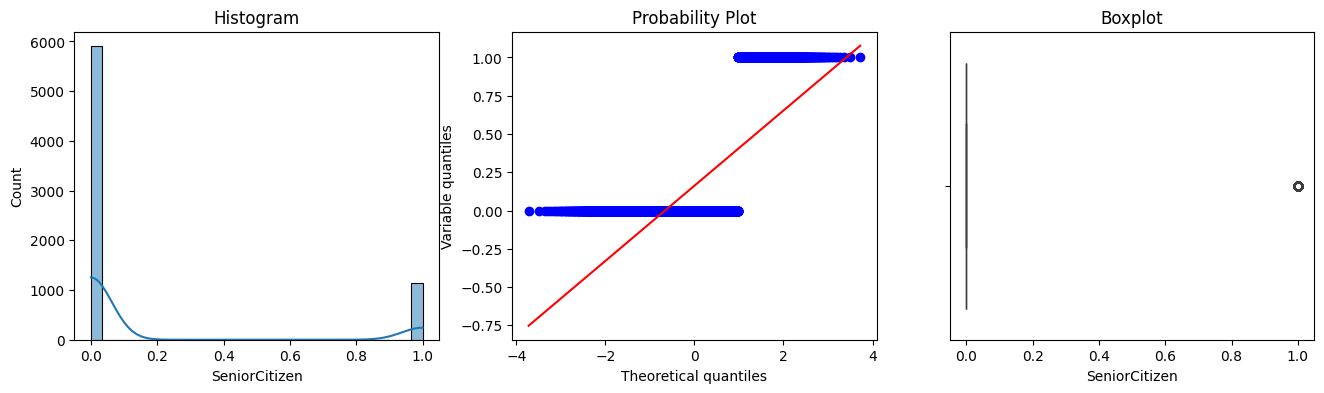

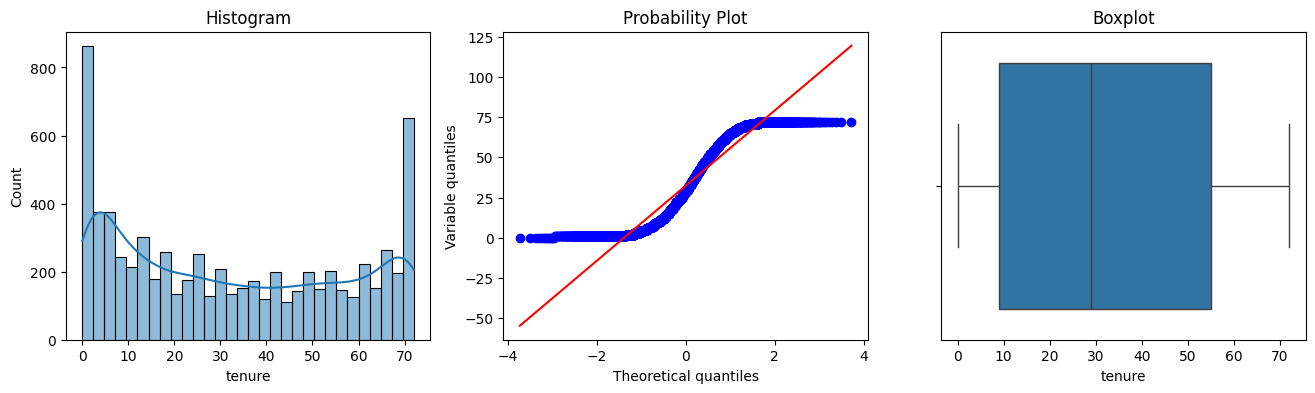

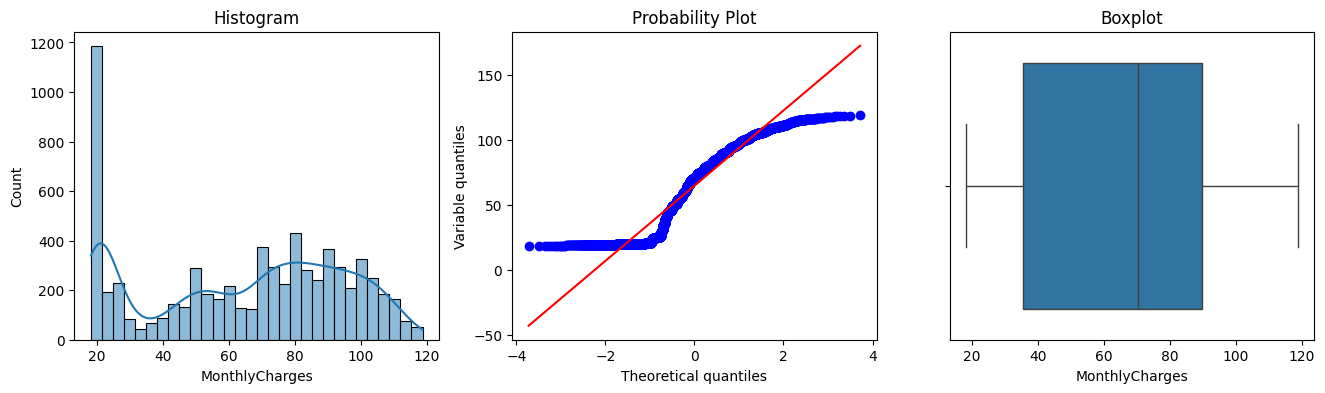

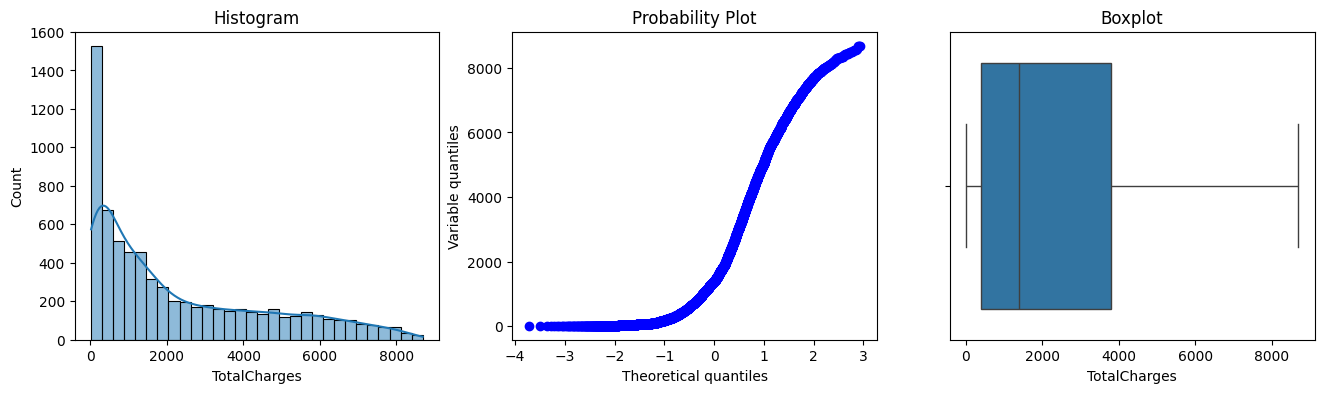

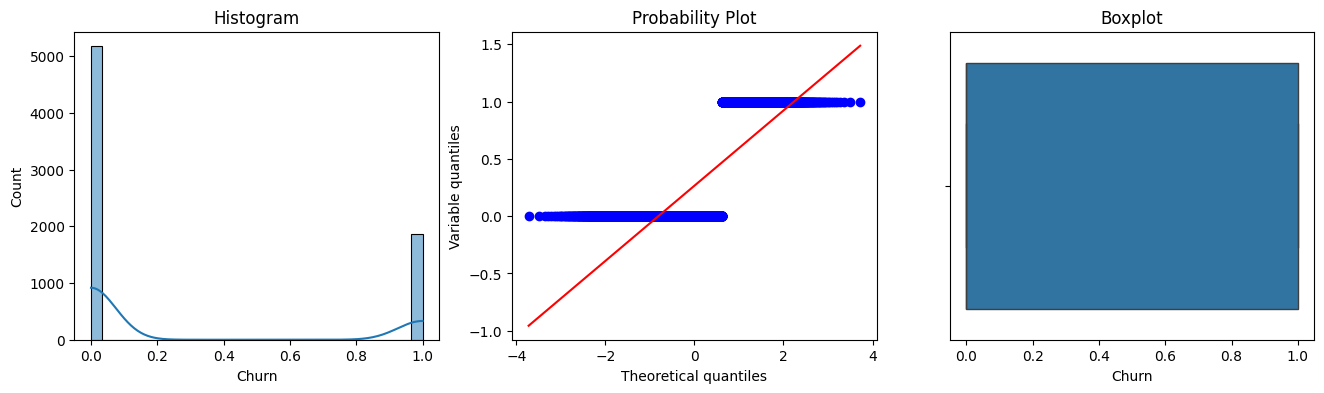

In [ ]:
distribution_data_numerik = df.select_dtypes(include=['number']).columns
for col in distribution_data_numerik:
    check_plot(df, col)

***Tidak ada outlier***

## Split Dataset

In [ ]:
X = df.drop(['Churn'],axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 19), (1409, 19), (5634,), (1409,))

In [ ]:
X_train.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1623,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45


In [ ]:
y_train.head(2)

,Churn
2142,0
1623,0


### Data Preprocessing

## Train

### Missing Value Handling
- (11 missing value pada TotalCharges)
- imputasi diterapkan hanya pada data train saja

In [ ]:
X_train['TotalCharges'].isnull().sum()

np.int64(10)

In [ ]:
X_test['TotalCharges'].isnull().sum()

np.int64(1)

In [ ]:
# imputasi missing value di TotalCharges pada data train
X_train['TotalCharges'] = X_train['TotalCharges'].fillna(X_train['TotalCharges'].median())
print('median TotalCharges : ', X_train['TotalCharges'].median())

median TotalCharges :  1410.8


check

In [ ]:
X_train['TotalCharges'].isnull().sum()

np.int64(0)

In [ ]:
X_test['TotalCharges'].isnull().sum()

np.int64(1)

Imputasi berhasil dan hanya dilakukan ***pada data train saja***

### Encoding

**Kolom-kolom yang akan di encoding**

---
Label Encoding (Biner):
1. Partner
2. Dependents
3. PhoneService
4. PaperlessBilling
5. Churn

---

Label Encoding (Ordinal):
1. MultipleLines
2. InternetService
3. OnlineSecurity
4. OnlineBackup
5. DeviceProtection
6. TechSupport
7. StreamingTV
8. StreamingMovies
9. Contract

---
One hot encoding:
1. gender
2. PaymentMethod

### Label Encoding (Biner)

In [ ]:
Xtrain_list_label_biner = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [ ]:
# value before encoding

for col in Xtrain_list_label_biner:
  print(X_train[col].value_counts())
  print()

Partner
No     2904
Yes    2730
Name: count, dtype: int64

Dependents
No     3951
Yes    1683
Name: count, dtype: int64

PhoneService
Yes    5082
No      552
Name: count, dtype: int64

PaperlessBilling
Yes    3325
No     2309
Name: count, dtype: int64



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Dictionary untuk menyimpan encoder tiap kolom
encoders = {}

for col in Xtrain_list_label_biner:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])   # Fit + transform hanya dilakukan di train
    encoders[col] = le                             # menyimpan encoder


In [ ]:
# value after encoding

for col in Xtrain_list_label_biner:
  print(X_train[col].value_counts())
  print()

Partner
0    2904
1    2730
Name: count, dtype: int64

Dependents
0    3951
1    1683
Name: count, dtype: int64

PhoneService
1    5082
0     552
Name: count, dtype: int64

PaperlessBilling
1    3325
0    2309
Name: count, dtype: int64



### Label Encoding (Ordinal)

MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract

In [ ]:
Xtrain_list_label_ordinal = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']

In [ ]:
# Dictionary mapping ordinal per kolom
ordinal_maps = {
    'MultipleLines': {'Yes':3, 'No':2, 'No phone service':1},
    'InternetService': {'Fiber optic':3, 'DSL':2, 'No':1},
    'OnlineSecurity': {'Yes':3, 'No':2, 'No internet service':1},
    'OnlineBackup': {'Yes':3, 'No':2, 'No internet service':1},
    'DeviceProtection': {'Yes':3, 'No':2, 'No internet service':1},
    'TechSupport': {'Yes':3, 'No':2, 'No internet service':1},
    'StreamingTV': {'Yes':3, 'No':2, 'No internet service':1},
    'StreamingMovies': {'Yes':3, 'No':2, 'No internet service':1},
    'Contract': {'Two year':3, 'One year':2, 'Month-to-month':1}
}

In [ ]:
# ===== Train =====
for col in Xtrain_list_label_ordinal:
    X_train[col + '_encoded'] = X_train[col].map(ordinal_maps[col]).fillna(0)

print(X_train[['MultipleLines','MultipleLines_encoded']].head())

         MultipleLines  MultipleLines_encoded
2142                No                      2
1623               Yes                      3
6074  No phone service                      1
1362                No                      2
6754               Yes                      3


In [ ]:
X_train.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded
2142,Female,0,0,1,21,1,No,DSL,Yes,No,Yes,No,No,Yes,One year,0,Mailed check,64.85,1336.80,2,2,3,2,3,2,2,3,2
1623,Female,0,0,0,54,1,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,1,Bank transfer (automatic),97.20,5129.45,3,3,2,3,2,2,3,3,3


### One Hot Encoding

In [ ]:
Xtrain_OHE = ['gender', 'PaymentMethod']

In [ ]:
X_train.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded
2142,Female,0,0,1,21,1,No,DSL,Yes,No,Yes,No,No,Yes,One year,0,Mailed check,64.85,1336.80,2,2,3,2,3,2,2,3,2
1623,Female,0,0,0,54,1,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,1,Bank transfer (automatic),97.20,5129.45,3,3,2,3,2,2,3,3,3


In [ ]:
# gender
dummies_gender = pd.get_dummies(X_train['gender'],prefix='gender',dtype=int)
dummies_gender.head()

,gender_Female,gender_Male
2142,1,0
1623,1,0
6074,0,1
1362,0,1
6754,0,1


In [ ]:
X_train = pd.concat([X_train, dummies_gender], axis=1)
X_train[['gender_Female','gender_Male']].head()

,gender_Female,gender_Male
2142,1,0
1623,1,0
6074,0,1
1362,0,1
6754,0,1


In [ ]:
# PaymentMethod
dummies_PaymentMethod = pd.get_dummies(X_train['PaymentMethod'],prefix='PaymentMethod',dtype=int)
dummies_PaymentMethod.head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,0,0,0,1
1623,1,0,0,0
6074,0,0,1,0
1362,0,0,1,0
6754,1,0,0,0


In [ ]:
X_train = pd.concat([X_train, dummies_PaymentMethod], axis=1)
X_train[['PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']].head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,0,0,0,1
1623,1,0,0,0
6074,0,0,1,0
1362,0,0,1,0
6754,1,0,0,0


In [ ]:
X_train.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,Female,0,0,1,21,1,No,DSL,Yes,No,Yes,No,No,Yes,One year,0,Mailed check,64.85,1336.80,2,2,3,2,3,2,2,3,2,1,0,0,0,0,1
1623,Female,0,0,0,54,1,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,1,Bank transfer (automatic),97.20,5129.45,3,3,2,3,2,2,3,3,3,1,0,1,0,0,0


## Test

transform di data test based on data train yang sudah di handling

### Missing Value

In [ ]:
# TotalCharges
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(X_train['TotalCharges'].median())
print('median TotalCharges : ', X_train['TotalCharges'].median())

median TotalCharges :  1410.8


### Encoding

### Label Encoding (Biner)

In [ ]:
Xtest_list_label_biner = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [ ]:
# value before encoding

for col in Xtest_list_label_biner:
  print(X_test[col].value_counts())
  print()

Partner
No     737
Yes    672
Name: count, dtype: int64

Dependents
No     982
Yes    427
Name: count, dtype: int64

PhoneService
Yes    1279
No      130
Name: count, dtype: int64

PaperlessBilling
Yes    846
No     563
Name: count, dtype: int64



In [ ]:
# label encoding

for col in Xtest_list_label_biner:
    le = encoders[col]                             # Ambil encoder yang sudah di fit dari train
    X_test[col] = le.transform(X_test[col])        # Hanya transform di test

In [ ]:
# value after encoding

for col in Xtest_list_label_biner:
  print(X_test[col].value_counts())
  print()

Partner
0    737
1    672
Name: count, dtype: int64

Dependents
0    982
1    427
Name: count, dtype: int64

PhoneService
1    1279
0     130
Name: count, dtype: int64

PaperlessBilling
1    846
0    563
Name: count, dtype: int64



### Label Encoding (Ordinal)

In [ ]:
Xtest_list_label_ordinal = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']

In [ ]:
# ===== Test =====
for col in Xtrain_list_label_ordinal:
    X_test[col + '_encoded'] = X_test[col].map(ordinal_maps[col]).fillna(0)

print(X_test[['MultipleLines','MultipleLines_encoded']].head())

         MultipleLines  MultipleLines_encoded
185   No phone service                      1
2715               Yes                      3
3825                No                      2
1807                No                      2
132                 No                      2


In [ ]:
X_test.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded
185,Female,0,1,0,1,0,No phone service,DSL,No,No,No,No,No,No,Month-to-month,1,Electronic check,24.80,24.80,1,2,2,2,2,2,2,2,1
2715,Male,0,0,0,41,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Bank transfer (automatic),25.25,996.45,3,1,1,1,1,1,1,1,1


### One Hot Encoding

In [ ]:
Xtest_OHE = ['gender', 'PaymentMethod']

In [ ]:
X_test.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded
185,Female,0,1,0,1,0,No phone service,DSL,No,No,No,No,No,No,Month-to-month,1,Electronic check,24.80,24.80,1,2,2,2,2,2,2,2,1
2715,Male,0,0,0,41,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Bank transfer (automatic),25.25,996.45,3,1,1,1,1,1,1,1,1


In [ ]:
# gender
dummies_gender = pd.get_dummies(X_test['gender'],prefix='gender',dtype=int)
dummies_gender.head()

,gender_Female,gender_Male
185,1,0
2715,0,1
3825,1,0
1807,1,0
132,0,1


In [ ]:
X_test = pd.concat([X_test, dummies_gender], axis=1)
X_test[['gender_Female','gender_Male']].head()

,gender_Female,gender_Male
185,1,0
2715,0,1
3825,1,0
1807,1,0
132,0,1


In [ ]:
# PaymentMethod
dummies_PaymentMethod = pd.get_dummies(X_test['PaymentMethod'],prefix='PaymentMethod',dtype=int)
dummies_PaymentMethod.head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,0,0,1,0
2715,1,0,0,0
3825,0,0,0,1
1807,0,0,1,0
132,1,0,0,0


In [ ]:
X_test = pd.concat([X_test, dummies_PaymentMethod], axis=1)
X_test[['PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']].head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,0,0,1,0
2715,1,0,0,0
3825,0,0,0,1
1807,0,0,1,0
132,1,0,0,0


In [ ]:
X_test.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,Female,0,1,0,1,0,No phone service,DSL,No,No,No,No,No,No,Month-to-month,1,Electronic check,24.80,24.80,1,2,2,2,2,2,2,2,1,1,0,0,0,1,0
2715,Male,0,0,0,41,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Bank transfer (automatic),25.25,996.45,3,1,1,1,1,1,1,1,1,0,1,1,0,0,0


## EDA

In [ ]:
X_train.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,Female,0,0,1,21,1,No,DSL,Yes,No,Yes,No,No,Yes,One year,0,Mailed check,64.85,1336.80,2,2,3,2,3,2,2,3,2,1,0,0,0,0,1
1623,Female,0,0,0,54,1,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,1,Bank transfer (automatic),97.20,5129.45,3,3,2,3,2,2,3,3,3,1,0,1,0,0,0


In [ ]:
X_test.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,Female,0,1,0,1,0,No phone service,DSL,No,No,No,No,No,No,Month-to-month,1,Electronic check,24.80,24.80,1,2,2,2,2,2,2,2,1,1,0,0,0,1,0
2715,Male,0,0,0,41,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Bank transfer (automatic),25.25,996.45,3,1,1,1,1,1,1,1,1,0,1,1,0,0,0


In [ ]:
#before drop
X_train.shape, X_test.shape

((5634, 34), (1409, 34))

In [ ]:
# columns (value=object) in X_train

X_train.select_dtypes(include=['object']).columns

Index(['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod'],
      dtype='object')

In [ ]:
# columns (value=object) in X_test

X_test.select_dtypes(include=['object']).columns

Index(['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod'],
      dtype='object')

In [ ]:
# delete all columns has object value

columns_object_Xtrain = X_train.select_dtypes(include=['object']).columns
columns_object_Xtest = X_test.select_dtypes(include=['object']).columns

X_train.drop(columns_object_Xtrain, axis=1, inplace=True)
X_test.drop(columns_object_Xtest, axis=1, inplace=True)

In [ ]:
# after drop
X_train.shape, X_test.shape

((5634, 23), (1409, 23))

In [ ]:
X_train.head(2)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,0,0,1,21,1,0,64.85,1336.80,2,2,3,2,3,2,2,3,2,1,0,0,0,0,1
1623,0,0,0,54,1,1,97.20,5129.45,3,3,2,3,2,2,3,3,3,1,0,1,0,0,0


In [ ]:
X_test.head(2)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,0,1,0,1,0,1,24.80,24.80,1,2,2,2,2,2,2,2,1,1,0,0,0,1,0
2715,0,0,0,41,1,1,25.25,996.45,3,1,1,1,1,1,1,1,1,0,1,1,0,0,0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5634 non-null   int64  
 1   Partner                                  5634 non-null   int64  
 2   Dependents                               5634 non-null   int64  
 3   tenure                                   5634 non-null   int64  
 4   PhoneService                             5634 non-null   int64  
 5   PaperlessBilling                         5634 non-null   int64  
 6   MonthlyCharges                           5634 non-null   float64
 7   TotalCharges                             5634 non-null   float64
 8   MultipleLines_encoded                    5634 non-null   int64  
 9   InternetService_encoded                  5634 non-null   int64  
 10  OnlineSecurity_encoded                   5634 non-n

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, 185 to 1161
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            1409 non-null   int64  
 1   Partner                                  1409 non-null   int64  
 2   Dependents                               1409 non-null   int64  
 3   tenure                                   1409 non-null   int64  
 4   PhoneService                             1409 non-null   int64  
 5   PaperlessBilling                         1409 non-null   int64  
 6   MonthlyCharges                           1409 non-null   float64
 7   TotalCharges                             1409 non-null   float64
 8   MultipleLines_encoded                    1409 non-null   int64  
 9   InternetService_encoded                  1409 non-null   int64  
 10  OnlineSecurity_encoded                   1409 non-n

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'Partner'}>,
        <Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'PhoneService'}>],
       [<Axes: title={'center': 'PaperlessBilling'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'MultipleLines_encoded'}>,
        <Axes: title={'center': 'InternetService_encoded'}>],
       [<Axes: title={'center': 'OnlineSecurity_encoded'}>,
        <Axes: title={'center': 'OnlineBackup_encoded'}>,
        <Axes: title={'center': 'DeviceProtection_encoded'}>,
        <Axes: title={'center': 'TechSupport_encoded'}>,
        <Axes: title={'center': 'StreamingTV_encoded'}>],
       [<Axes: title={'center': 'StreamingMovies_encoded'}>,
        <Axes: title={'center': 'Contract_encoded'}>,
        <Axes: title={'center': 'gender_Female'}>,
        <Axes: title={'

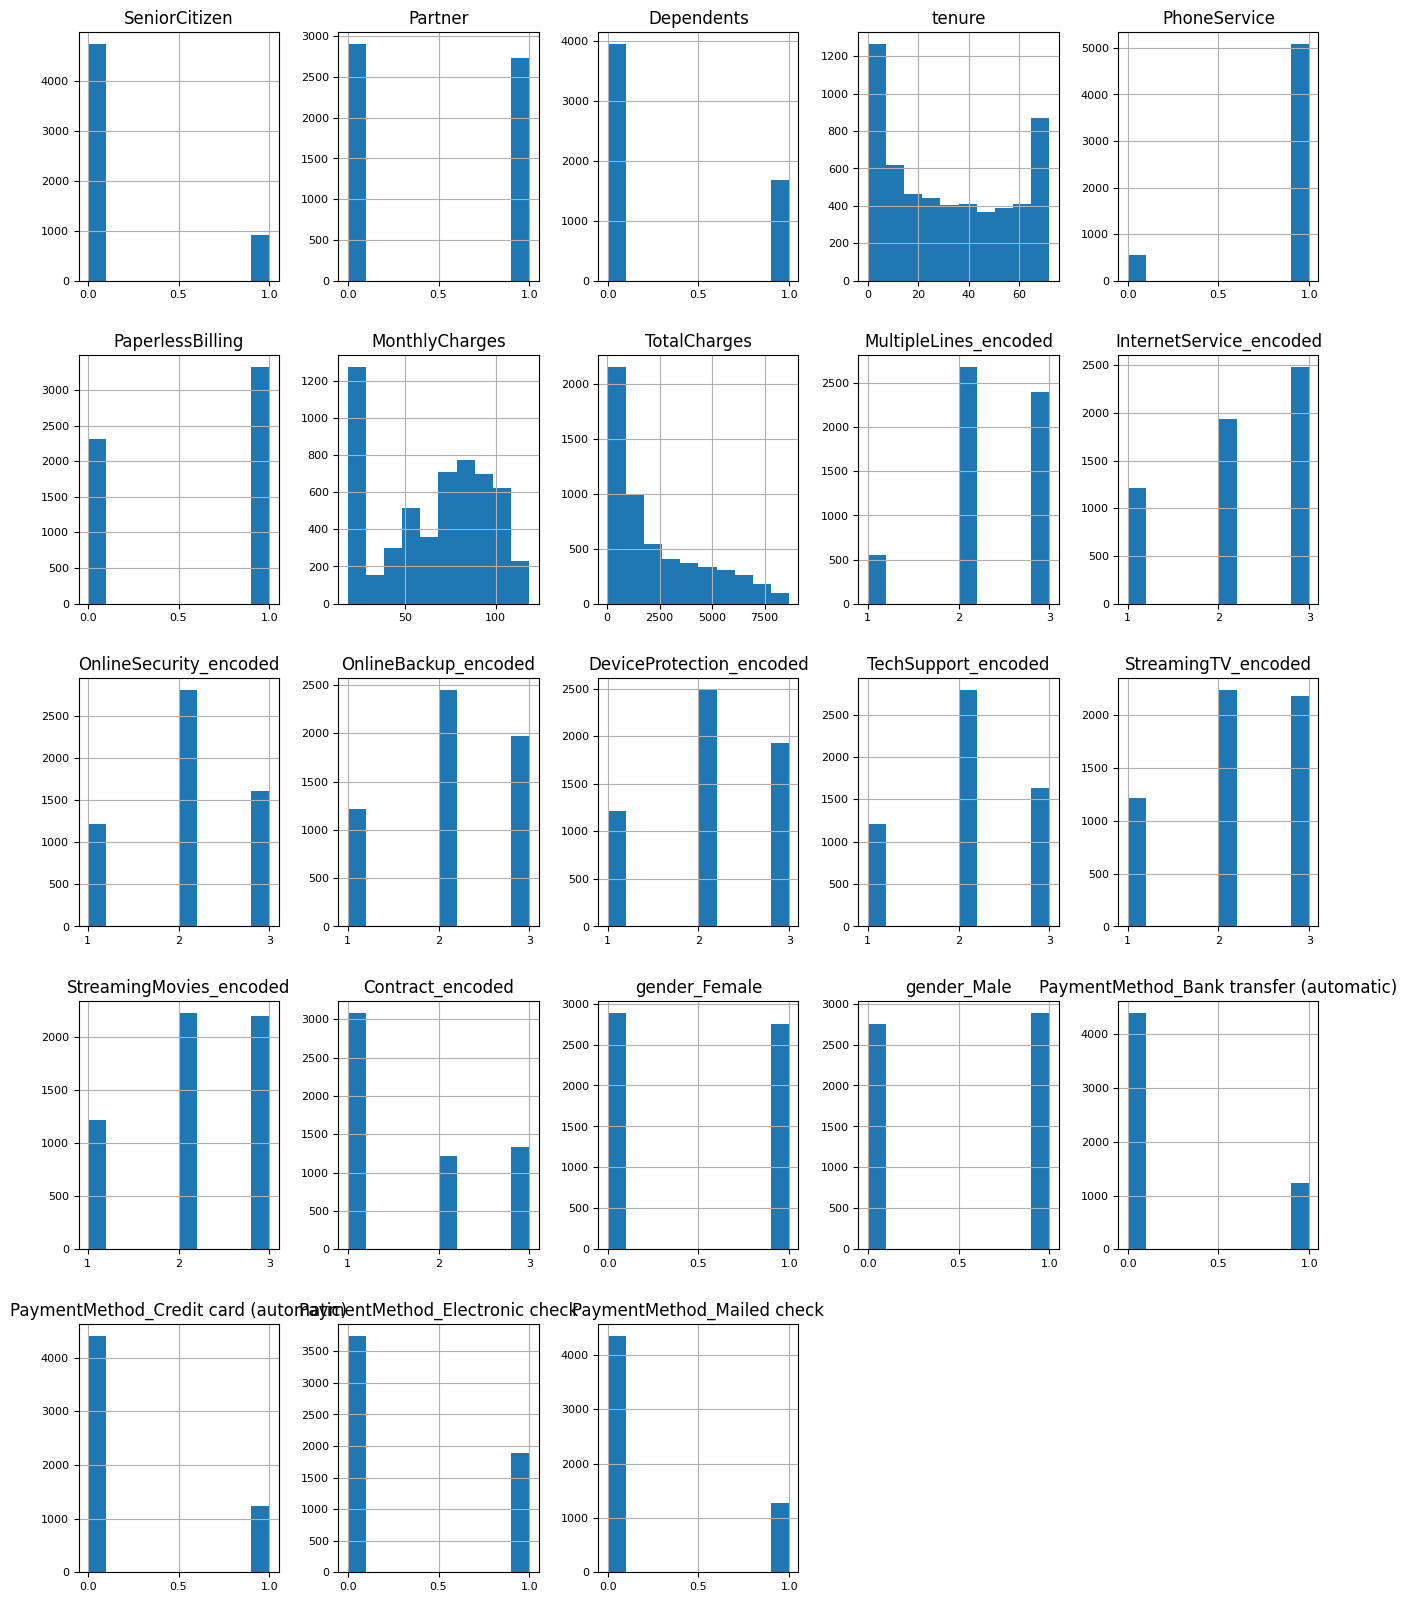

In [ ]:
# histogram X_train
X_train.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8)

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'Partner'}>,
        <Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'PhoneService'}>],
       [<Axes: title={'center': 'PaperlessBilling'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'MultipleLines_encoded'}>,
        <Axes: title={'center': 'InternetService_encoded'}>],
       [<Axes: title={'center': 'OnlineSecurity_encoded'}>,
        <Axes: title={'center': 'OnlineBackup_encoded'}>,
        <Axes: title={'center': 'DeviceProtection_encoded'}>,
        <Axes: title={'center': 'TechSupport_encoded'}>,
        <Axes: title={'center': 'StreamingTV_encoded'}>],
       [<Axes: title={'center': 'StreamingMovies_encoded'}>,
        <Axes: title={'center': 'Contract_encoded'}>,
        <Axes: title={'center': 'gender_Female'}>,
        <Axes: title={'

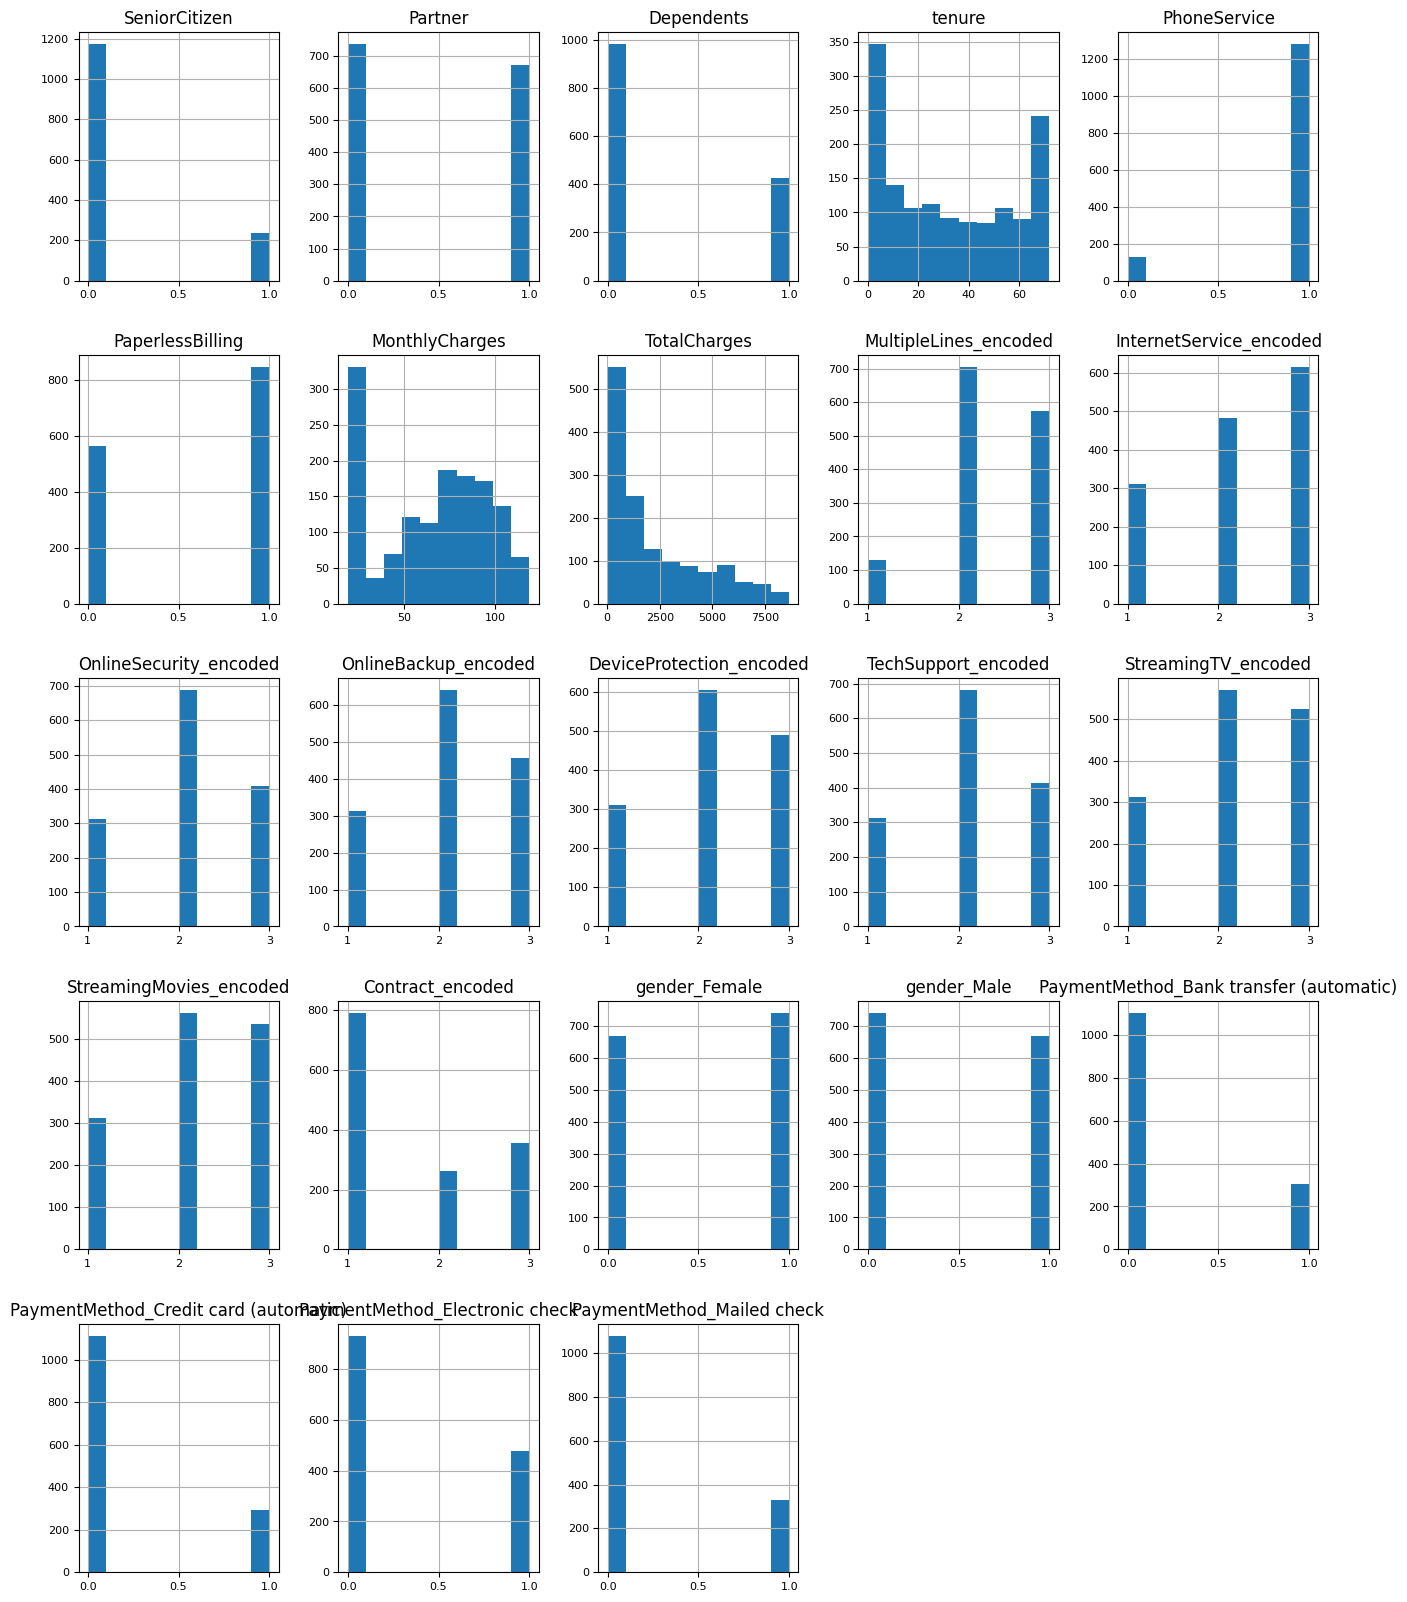

In [ ]:
# histogram X_test
X_test.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8)

<Axes: >

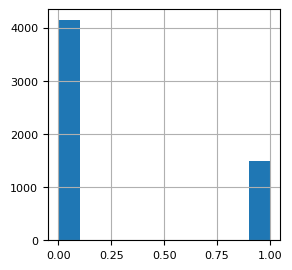

In [ ]:
# histogram y_train
y_train.hist(figsize=(3, 3), bins=10, xlabelsize=8, ylabelsize=8)

<Axes: >

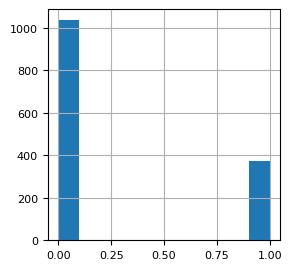

In [ ]:
# histogram y_test
y_test.hist(figsize=(3, 3), bins=10, xlabelsize=8, ylabelsize=8)

 **Ada ke tidak seimbangan pada target, akan dilakukan imbalance oversampling handling pada data train**

###correlation

In [ ]:
train_df = X_train.copy()
train_df['churn'] = y_train

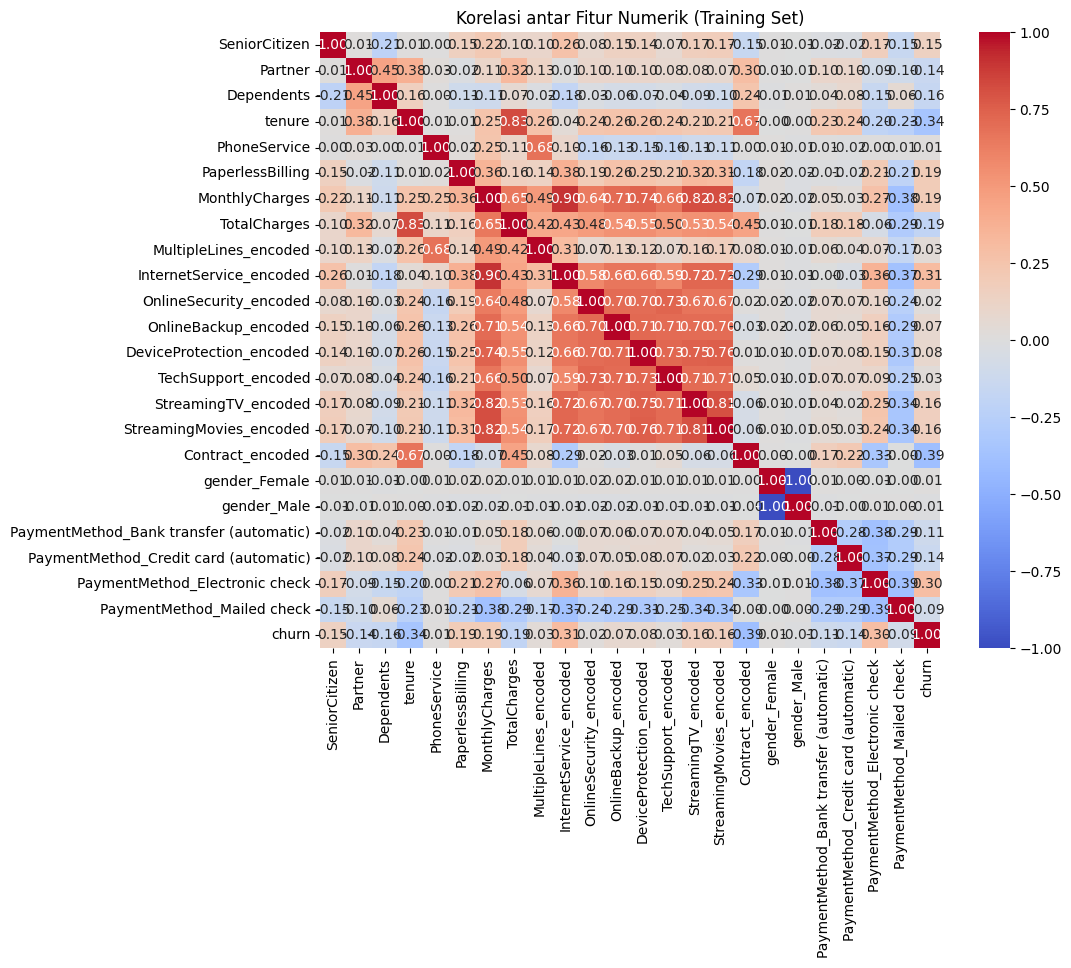

In [ ]:
corr_matrix = train_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar Fitur Numerik (Training Set)")
plt.show()


In [ ]:
corr_with_target = train_df.corr()['churn'].sort_values(ascending=False)
print("Korelasi fitur numerik dengan target:")
print(corr_with_target)

Korelasi fitur numerik dengan target:
churn                                      1.000000
InternetService_encoded                    0.310780
PaymentMethod_Electronic check             0.296304
PaperlessBilling                           0.191324
MonthlyCharges                             0.188574
StreamingMovies_encoded                    0.163244
StreamingTV_encoded                        0.160454
SeniorCitizen                              0.147078
DeviceProtection_encoded                   0.084407
OnlineBackup_encoded                       0.072103
MultipleLines_encoded                      0.031833
TechSupport_encoded                        0.026057
OnlineSecurity_encoded                     0.020453
gender_Female                              0.011729
PhoneService                               0.008886
gender_Male                               -0.011729
PaymentMethod_Mailed check                -0.092425
PaymentMethod_Bank transfer (automatic)   -0.109419
PaymentMethod_Credit card 

### Modeling (Gunakan lebih min 2 model dan bandingkan hasil evaluasinya)

Bebas menggunakan model, mau menggunakan decision tree, random forest, xgboost, dll juga boleh<br><br>
silahkan berekspresi :)

### Handling imbalance

***imbalance oversampling dilakukan hanya pada data Train saja***

In [ ]:
from imblearn.over_sampling import SMOTE

# Oversampling dengan SMOTE
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)

# Jadikan DataFrame kembali dengan nama kolom asli
df_smote = pd.DataFrame(X_train, columns=X_train.columns)
df_smote['churn'] = y_train

# Cek distribusi churn
print(df_smote['churn'].value_counts())

churn
0    4138
1    4138
Name: count, dtype: int64


### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### Random Forest

In [ ]:
# RandomForest


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model_RF = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(model_RF, X_train_std, y_train, cv=10, scoring='f1')

# Print hasil
print("F1-score rata-rata:", cv_scores)
print("F1-score rata-rata:", cv_scores.mean())

F1-score rata-rata: [0.67496542 0.6504298  0.66478873 0.79269883 0.91590909 0.91590909
 0.91647856 0.91940976 0.90950226 0.92377702]
F1-score rata-rata: 0.8283868560812847


### Evaluation

In [ ]:
# latih model di data train
model_RF.fit(X_train_std, y_train)

# prediksi di data test
y_test_pred_RF = model_RF.predict(X_test_std)

# evaluasi performa model
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_test_pred_RF))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1036
           1       0.58      0.55      0.57       373

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.77      0.77      0.77      1409



Pada model Random Forest kemampuan memprediksi nilai 1 atau churn

- precision 58% (data yang benar melakukan churn yang ditangkap model)
- recall 55% dapat menangkap data yang benar2 churn
- accuracy 77% akurasi total prediksi menangkap dari data test

### Decision Tree

In [ ]:
# decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model_DT = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(model_DT, X_train_std, y_train, cv=10, scoring='f1')

# Print hasil
print("F1-score rata-rata:", cv_scores)
print("F1-score rata-rata:", cv_scores.mean())

F1-score rata-rata: [0.62637363 0.61322082 0.59944751 0.7324291  0.8606466  0.86830357
 0.87837838 0.87513812 0.87024609 0.89285714]
F1-score rata-rata: 0.7817040954814212


### Evaluation

In [ ]:
# latih model di data train
model_DT.fit(X_train_std, y_train)

# prediksi di data test
y_test_pred_DT = model_DT.predict(X_test_std)

# evaluasi performa model
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_test_pred_DT))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1036
           1       0.46      0.51      0.48       373

    accuracy                           0.71      1409
   macro avg       0.64      0.65      0.64      1409
weighted avg       0.72      0.71      0.72      1409



Pada model Decision Tree kemampuan memprediksi nilai 1 atau churn

- precision 46% (data yang benar melakukan churn yang ditangkap model)
- recall 51% dapat menangkap data yang benar2 churn
- accuracy 71% akurasi total memprediksi dari data test/data baru

### Kesimpulan

pada nilai akurasi total :

- Decision Tree 71% & Random Forest 77%

- ***Decision Tree < Random Forest***

***model yang lebih unggul dalam memprediksi nilai churn adalah Random Forest***

### Potential impact

Simulasikan potential impact

impact dari model random forest adalah
1. model masih kurang baik dalam menangkap atau memprediksi pelanggan yang benar-benar melakukan churn dilihat dari nilai recall hanya 55%
2. artinya 45% kemungkinan pelanggan yang sebenarnya akan melakukan churn tapi tidak tertangkap oleh model (true negative)
3. akhirnya kita akan mengabaikan pelanggan yang berpotensi melakukan churn

***Dampaknya, banyak pelanggan yang benar-benar churn akan terabaikan, sehingga strategi retensi berisiko tidak tepat sasaran dan terlalu fokus pada pelanggan loyal.***